1.Perform data quality checks by checking for missing values, if any.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
employee_data = pd.read_csv('../data/HR_comma_sep.csv')
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
employee_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

2.Understand what factors contributed most to employee turnover at EDA.

    2.1 Draw a heatmap of the correlation matrix between all numerical features or columns in the data.




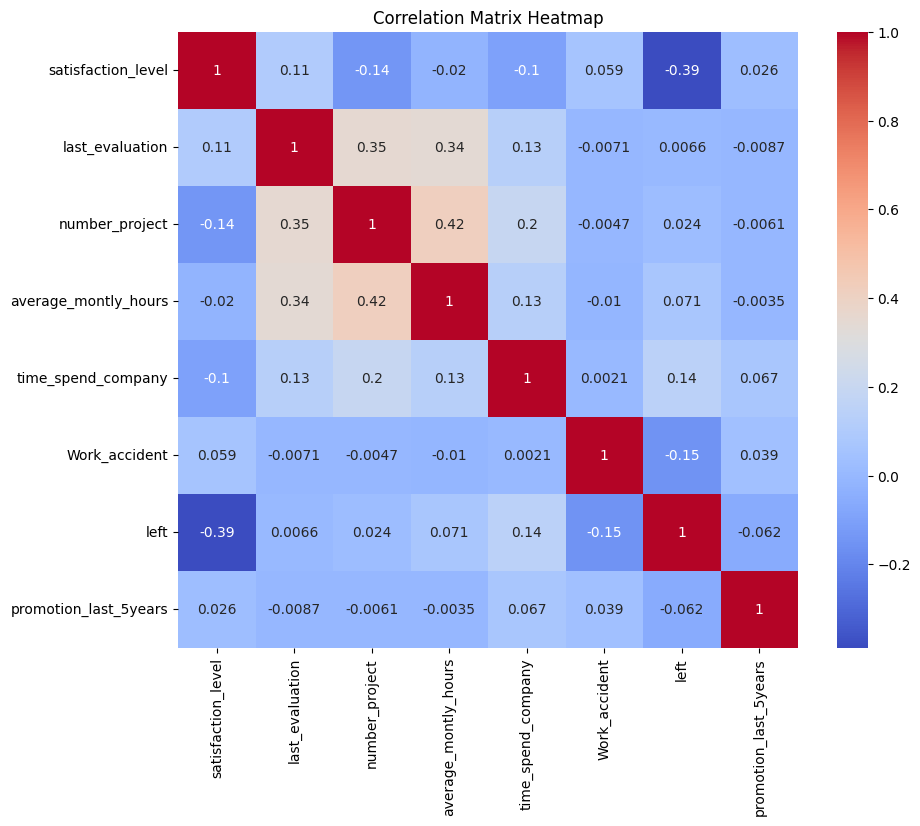

In [5]:
import seaborn as sns

numeric_features = employee_data.select_dtypes(include=[np.number])
# Compute correlation matrix
corr_matrix = numeric_features.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

 2.2 Draw the distribution plot of:

        - Employee Satisfaction (use column satisfaction_level)

        - Employee Evaluation (use column last_evaluation)

        - Employee Average Monthly Hours (use column average_montly_hours)

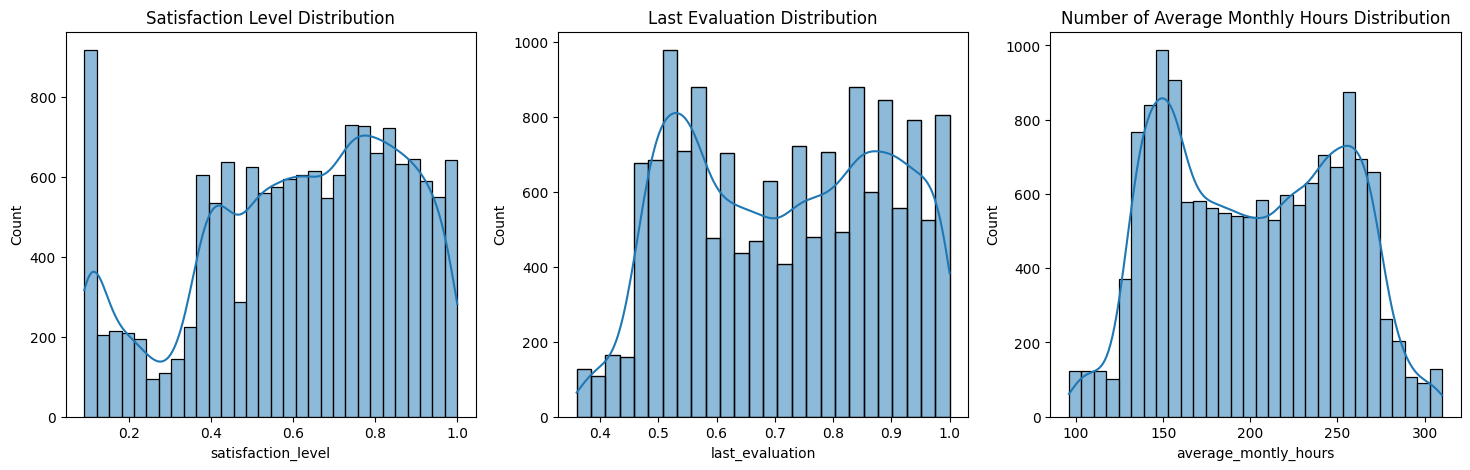

In [6]:
plt.figure(figsize=(18, 5))
#Satisfaction Level Distribution
plt.subplot(1, 3, 1)
sns.histplot(employee_data['satisfaction_level'], kde=True)
plt.title('Satisfaction Level Distribution')
 
# Last Evaluation Distribution
plt.subplot(1, 3, 2)
sns.histplot(employee_data['last_evaluation'], kde=True)
plt.title('Last Evaluation Distribution')


# Number of Average Monthly Hours Distribution
plt.subplot(1, 3, 3)
sns.histplot(employee_data['average_montly_hours'], kde=True)
plt.title('Number of Average Monthly Hours Distribution')
plt.show()


    2.3 Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

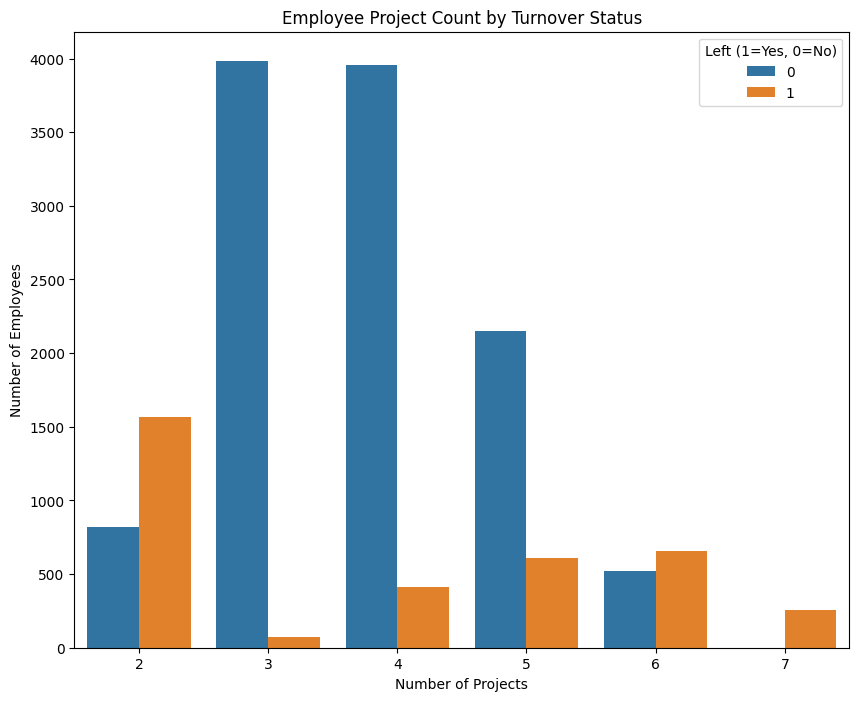

In [7]:
plt.figure(figsize=(10, 8))
sns.countplot(x='number_project', hue='left', data=employee_data)
plt.title('Employee Project Count by Turnover Status')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left (1=Yes, 0=No)')
plt.show()

3. Perform clustering of employees who left based on their satisfaction and evaluation.

    3.1 Choose columns satisfaction_level, last_evaluation, and left.

    3.2 Do K-means clustering of employees who left the company into 3 clusters?

    3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

/var/folders/bh/hy9qf3zd7gbbmsykdy2z4j2m0000gn/T/ipykernel_37896/1555040745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.fit_predict(features)


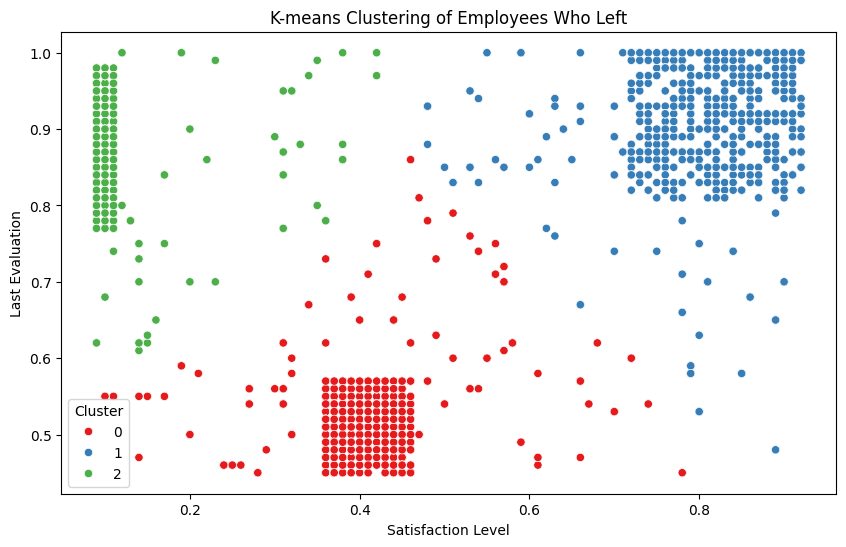

In [8]:
from sklearn.cluster import KMeans
# Filter employees who left
left_employees = employee_data[employee_data['left'] == 1]
# Select relevant features
features = left_employees[['satisfaction_level', 'last_evaluation']]
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(features)
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='Set1')
plt.title('K-means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

Low satisfaction is a common factor among employees who leave, regardless of their evaluation scores.
Some high-performing employees also leave if they are not satisfied, indicating that retention strategies should focus on improving satisfaction, not just performance.
HR should pay special attention to employees with low satisfaction, even if their evaluations are high.

4.Handle the left Class Imbalance using the SMOTE technique.

    4.1 Pre-process the data by converting categorical columns to numerical columns by:

        - Separating categorical variables and numeric variables

        - Applying get_dummies() to the categorical variables

        - Combining categorical variables and numeric variables

    4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

    4.3 Upsample the train dataset using the SMOTE technique from the imblearn module.

In [10]:
from imblearn.over_sampling import SMOTE

# 4.1 Pre-process the data by converting categorical variables to numerical ones. 

category_features = employee_data.select_dtypes(include=['object']).columns
numeric_features = employee_data.select_dtypes(include=[np.number]).columns.drop('left')


# Apply get_dummies to categorical features
employee_data_cat = pd.get_dummies(employee_data, columns=category_features, drop_first=True)

# Combine numeric features with encoded categorical features
X = pd.concat([employee_data[numeric_features], employee_data_cat], axis=1)
y = employee_data['left']

# 4.2 Stratified train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

# 4.3 Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


Before SMOTE: left
0    9142
1    2857
Name: count, dtype: int64
After SMOTE: left
0    9142
1    9142
Name: count, dtype: int64


5. Perform 5-fold cross-validation model training and evaluate performance.

    5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

    5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

    5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report

# Use 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# 5.1 Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=123)
y_pred_lr = cross_val_predict(lr, X_train_smote, y_train_smote, cv=cv)
print("Logistic Regression Classification Report:")
print(classification_report(y_train_smote, y_pred_lr))

# 5.2 Random Forest Classifier
rf = RandomForestClassifier(random_state=123)
y_pred_rf = cross_val_predict(rf, X_train_smote, y_train_smote, cv=cv)
print("Random Forest Classification Report:")
print(classification_report(y_train_smote, y_pred_rf))

# 5.3 Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=123)
y_pred_gb = cross_val_predict(gb, X_train_smote, y_train_smote, cv=cv)
print("Gradient Boosting Classification Report:")
print(classification_report(y_train_smote, y_pred_gb))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macr

6. Identify the best model and justify the evaluation metrics used.

    6.1 Find the ROC/AUC for each model and plot the ROC curve.

    6.2 Find the confusion matrix for each of the models.

    6.3 Explain which metric needs to be used from the confusion matrix: Recall or Precision?



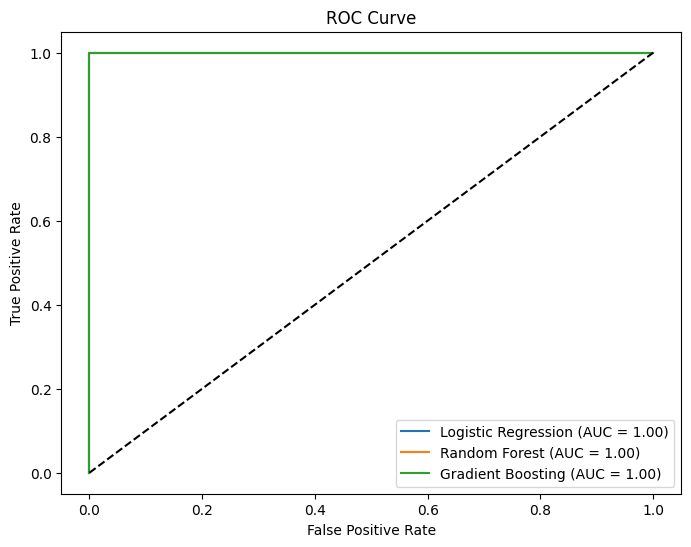

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}

plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [13]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{cm}\n")

Logistic Regression Confusion Matrix:
[[2286    0]
 [   0  714]]

Random Forest Confusion Matrix:
[[2286    0]
 [   0  714]]

Gradient Boosting Confusion Matrix:
[[2286    0]
 [   0  714]]



Recall measures how many actual leavers (class 1) your model correctly identifies.
In HR analytics, it is more important to catch as many employees who might leave as possible (minimize false negatives), so you can take action to retain them.

7. Suggest various retention strategies for targeted employees.

    7.1 Using the best model, predict the probability of employee turnover in the test data.

    7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

        - Safe Zone (Green) (Score < 20%)

        - Low-Risk Zone (Yellow) (20% < Score < 60%)

        - Medium-Risk Zone (Orange) (60% < Score < 90%)

        - High-Risk Zone (Red) (Score > 90%).

In [ ]:
# 7.1 Assume 'best_model' is your chosen model (e.g., RandomForestClassifier)
best_model = RandomForestClassifier(random_state=123)
best_model.fit(X_train_smote, y_train_smote)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of leaving


[0.   0.07 0.02 ... 0.   0.   1.  ]


In [20]:
# Create risk zone labels
risk_zone = pd.cut(
    y_proba,
    bins=[0, 0.2, 0.6, 0.9, 1.0],
    labels=['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)']
)

# Add to test set for analysis
test_results = X_test.copy()
test_results['turnover_probability'] = y_proba
test_results['risk_zone'] = risk_zone
test_results.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,number_project,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,turnover_probability,risk_zone
10627,0.98,0.77,3,191,2,0,0,0.98,0.77,3,...,False,False,False,True,False,False,False,True,0.00,NaN
2703,0.76,0.93,3,271,5,0,0,0.76,0.93,3,...,False,False,False,False,False,False,True,False,0.07,Safe Zone (Green)
6059,0.70,0.93,3,185,4,0,0,0.70,0.93,3,...,False,False,False,False,False,False,False,True,0.02,Safe Zone (Green)
3258,0.48,0.61,3,223,3,1,0,0.48,0.61,3,...,False,False,False,False,True,False,False,True,0.00,NaN
4565,0.57,0.90,3,144,2,0,0,0.57,0.90,3,...,False,False,False,False,False,False,False,True,0.00,NaN


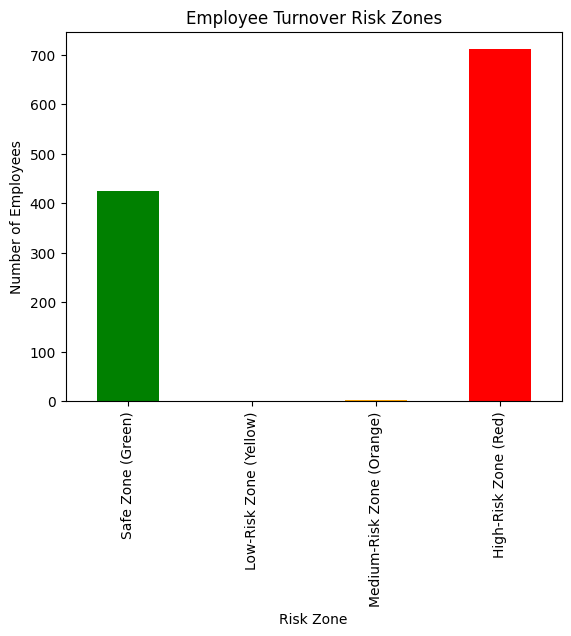

In [17]:
import matplotlib.pyplot as plt

zone_counts = test_results['risk_zone'].value_counts().reindex([
    'Safe Zone (Green)', 
    'Low-Risk Zone (Yellow)', 
    'Medium-Risk Zone (Orange)', 
    'High-Risk Zone (Red)'
])

zone_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Employee Turnover Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.show()